## Exercício: Modelo de Linguagem com auto-atenção

#####Priscila Marques de Oliveira
#####RA 094312

Este exercício é similar ao da aula passada, mas iremos agora treinar uma rede neural *com auto-atenção* para prever a próxima palavra de um texto, data as palavras anteriores como entrada.

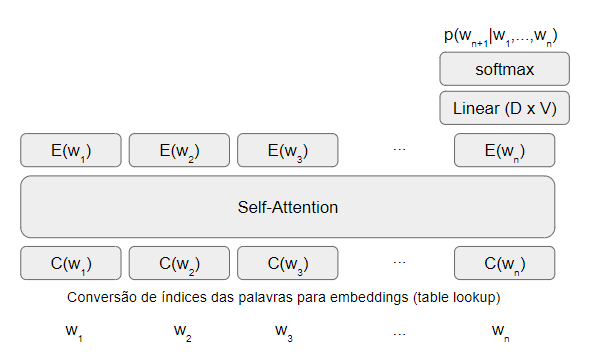

Na camada de auto-atenção, deve-se implementar (vide slide 41):
- Embeddings de posição
- Projeções lineares (WQ, WK, WV, WO)
- Camada de feed forward (2-layer MLP)



Instrucões:
- É necessário fazer duas implementações da camada de auto-atenção: uma usando laços (ineficiente, mas fácil de entender) e outra matricial (eficiente mas difícil de entender). Usar slide 41 como referência.

- Fazer um assert para garantir que o resultado das duas implementações é exatamente igual.

- No treinamento, usar apenas a implementação matricial.

## Faz download e carrega o dataset

In [ ]:
!git clone https://github.com/ethelbeluzzi/projetomachado

Cloning into 'projetomachado'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 65 (delta 24), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 7.21 MiB | 3.89 MiB/s, done.
Resolving deltas: 100% (24/24), done.


In [ ]:
import os
# >>> Análise varia dependendo do formato que os dados são fornecidos <<<

DATA_PATH = os.path.join("projetomachado", "textonormalizado1000.txt")

# Abrir arquito textual e ler os dados originais
with open(DATA_PATH, "r") as data_file:
    data_text = data_file.read()

# Número total de caracteres no dataset
len(data_text)

18845445

In [ ]:
# Dados já foram separados em linhas
# Checar tamanho das linhas em caracteres, por curiosidade
lines = []
line_lens = []

with open(DATA_PATH, "r") as data_file:
    for line in data_file:
        lines.append(line)
        line_lens.append(len(line))


In [ ]:
lines[0]

'1\n'

In [ ]:
# Limpar linhas, removendo \n, espaços antes e depois
with open(DATA_PATH, "r") as data_file:
    cleaned_lines = [line.strip().lower() for line in data_file]

len(cleaned_lines)

306409

In [ ]:
# É possível voltar a um texto monolítico juntando as linhas. Nota-se que estamos adicionando espaços, mas não há mais \n
full_data = ' '.join(cleaned_lines)
len(full_data)

18845444

In [ ]:
full_data[:1000]

'1 ministério da cultura fundação biblioteca nacional departamento nacional do livro a mão e a luva machado de assis i o fim da carta mas que pretendes fazer agora? morrer. morrer? que idéia! deixate disso, estêvão. não se morre por tão pouco... morrese. quem não padece estas dores não as pode avaliar. o golpe foi profundo, e o meu coração é pusilânime; por mais aborrecível que pareça a idéia da morte, pior, muito pior do que ela, é a de viver. ah! tu não sabes o que isto é? sei: um namoro gorado... luís! ... e se em cada caso de namoro gorado morresse um homem, tinha já diminuído muito o gênero humano, e malthus perderia o latim. anda, sobe. estêvão meteu a mão nos cabelos com um gesto de angústia; luís alves sacudiu a cabeça e sorriu. achavamse os dois no corredor da casa de luís alves, à rua da constituição,  que então se chamava dos ciganos;  então, isto é, em 1853, uma bagatela de vinte anos que lá vão, levando talvez consigo as ilusões do leitor, e deixandolhe em troca usurários!

### Pré Processamento

### Separa em tokens o texto

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer

def preprocess_text(text, keep_punctuation=False):
    """
    Pré-processamento para corpus de previsão da próxima palavra.
    - lowercase
    - normaliza espaços
    - substituir números por <NUM>
    """
    text = text.lower()

    text = re.sub(r"\s+", " ", text).strip()

    #text = re.sub(r"\d+", "<NUM>", text)

    tokens = word_tokenize(text)

    return tokens


In [ ]:
word_tokens = preprocess_text(full_data)

In [ ]:
word_tokens[:1000]

['1',
 'ministério',
 'da',
 'cultura',
 'fundação',
 'biblioteca',
 'nacional',
 'departamento',
 'nacional',
 'do',
 'livro',
 'a',
 'mão',
 'e',
 'a',
 'luva',
 'machado',
 'de',
 'assis',
 'i',
 'o',
 'fim',
 'da',
 'carta',
 'mas',
 'que',
 'pretendes',
 'fazer',
 'agora',
 '?',
 'morrer',
 '.',
 'morrer',
 '?',
 'que',
 'idéia',
 '!',
 'deixate',
 'disso',
 ',',
 'estêvão',
 '.',
 'não',
 'se',
 'morre',
 'por',
 'tão',
 'pouco',
 '...',
 'morrese',
 '.',
 'quem',
 'não',
 'padece',
 'estas',
 'dores',
 'não',
 'as',
 'pode',
 'avaliar',
 '.',
 'o',
 'golpe',
 'foi',
 'profundo',
 ',',
 'e',
 'o',
 'meu',
 'coração',
 'é',
 'pusilânime',
 ';',
 'por',
 'mais',
 'aborrecível',
 'que',
 'pareça',
 'a',
 'idéia',
 'da',
 'morte',
 ',',
 'pior',
 ',',
 'muito',
 'pior',
 'do',
 'que',
 'ela',
 ',',
 'é',
 'a',
 'de',
 'viver',
 '.',
 'ah',
 '!',
 'tu',
 'não',
 'sabes',
 'o',
 'que',
 'isto',
 'é',
 '?',
 'sei',
 ':',
 'um',
 'namoro',
 'gorado',
 '...',
 'luís',
 '!',
 '...',
 'e',


In [ ]:
len(word_tokens)

3889105

### Criação de pares (contexto -> alvo)

In [ ]:
def generate_pairs(word_tokens, context_size):
    pairs = []

    for indice in range(len(word_tokens) - context_size):
        context = (word_tokens[indice: indice + context_size])
        target = (word_tokens[indice + context_size])

        pairs.append((context, target))

    return pairs

In [ ]:
context_size = 5 # 5 palavras de entrada. O target é a próxima palavra
all_pairs = []
all_pairs = generate_pairs(word_tokens, context_size)

In [ ]:
len(all_pairs)

3889100

In [ ]:
all_pairs[:5]

[(['1', 'ministério', 'da', 'cultura', 'fundação'], 'biblioteca'),
 (['ministério', 'da', 'cultura', 'fundação', 'biblioteca'], 'nacional'),
 (['da', 'cultura', 'fundação', 'biblioteca', 'nacional'], 'departamento'),
 (['cultura', 'fundação', 'biblioteca', 'nacional', 'departamento'],
  'nacional'),
 (['fundação', 'biblioteca', 'nacional', 'departamento', 'nacional'], 'do')]

### Divisão entre treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Divide o dattaset entre treinamento e validação
train_pairs, val_pairs = train_test_split(all_pairs, test_size=0.20, random_state=18)

In [ ]:
len(train_pairs)

3111280

In [ ]:
train_pairs[:5]

[(['casa', 'às', 'seis', 'horas', 'em'], 'ponto'),
 (['efeitos', 'são', 'fenômenos', 'perfeitamente', 'admiráveis'], '.'),
 (['l', 'e', 'ela', '?', 'se'], 'conheceste'),
 (['natural', 'vexame', 'que', 'a', 'narração'], 'mundana'),
 (['que', 'por', 'ela', '.', 'paulo'], 'sentia')]

In [ ]:
len(val_pairs)

777820

In [ ]:
val_pairs[:5]

[(['da', 'evangelinez', ',', 'de', 'longfellow'], '.'),
 (['no', 'céu', 'e', 'em', 'maricá'], '.'),
 (['relação', 'a', 'outras', 'restrinjome', 'à'], 'admissão'),
 (['depois', ',', 'aos', 'tribunais', 'do'], 'falências'),
 (['animal', ',', 'que', 'lhe', 'comera'], 'o')]

## Criando um vocabulário

In [ ]:
# o comando zip é utilizado para acoplar iteráveis. Quando uttilizado com *, ele separa. No caso abaixo, ele separa o train_pairs em nas lista de contexto e no target
X_train, Y_train = zip(*train_pairs) if train_pairs else ([], [])
train_tokens = list(X_train) + list(Y_train)

In [ ]:
X_train

(['casa', 'às', 'seis', 'horas', 'em'],
 ['efeitos', 'são', 'fenômenos', 'perfeitamente', 'admiráveis'],
 ['l', 'e', 'ela', '?', 'se'],
 ['natural', 'vexame', 'que', 'a', 'narração'],
 ['que', 'por', 'ela', '.', 'paulo'],
 ['pedra', ',', 'e', 'ainda', 'a'],
 ['.', 'tudo', 'isto', 'me', 'era'],
 ['tanto', 'ou', 'mais', 'que', 'no'],
 ['as', 'relações', 'com', 'você', '.'],
 ['.', '.', 'pode', 'ser', 'que'],
 ['diferente', ',', 'mas', 'por', 'ora'],
 ['princípio', 'de', 'cousas', 'indiferentes', ';'],
 ['arrependimento', 'da', 'promessa', '.', 'católica'],
 ['...', 'as', 'minhas', 'cessaram', 'logo'],
 ['do', 'céu', 'ao', 'sol', 'do'],
 ['fixamente', 'um', 'instante', ';', 'depois'],
 ['das', 'pernas', 'pendentes', ',', 'a'],
 ['pedido', ',', 'consentiu', 'e', 'agradeceu'],
 ['?', 'disse', 'ele', '.', 'posso'],
 [',', 'porque', 'o', 'eterno', 'feminino'],
 [',', 'e', 'outras', 'diversões', 'os'],
 ['o', 'mais', 'que', 'o', 'eleitor'],
 ['sombras', ',', 'e', 'desviando', 'os'],
 ['quando'

In [ ]:
Y_train

('ponto',
 '.',
 'conheceste',
 'mundana',
 'sentia',
 'pedra',
 'agora',
 'primeiro',
 'já',
 'não',
 'eram',
 'depois',
 'e',
 '.',
 'grande',
 'riu',
 'verselhe',
 'deslumbrado',
 'enfim',
 'não',
 'traziam',
 'podia',
 'olhos',
 'outros',
 'observarem',
 'josé',
 'um',
 'castro',
 'se',
 'nalma',
 'alguma',
 'não',
 'inferioridade',
 'como',
 'do',
 'cousa',
 'a',
 'calmas',
 'somente',
 'muita',
 'coisas',
 'todo',
 'ver',
 'que',
 'dores',
 'ora',
 'gastou',
 ',',
 'recente',
 'de',
 'cocheiro',
 'arqueadas',
 '.',
 'música',
 ',',
 'sentavam',
 'engole',
 'um',
 'escritas',
 'venderiam',
 'lado',
 'haviam',
 'ação',
 'ia',
 'jornais',
 'embora',
 ',',
 'sabendo',
 'bordo',
 'lhe',
 'lingüística',
 'o',
 'project',
 'contou',
 ';',
 '.',
 ',',
 'e',
 'os',
 'life',
 'viver',
 'de',
 'o',
 'mais',
 'tão',
 'consentim',
 'o',
 'eram',
 'disse',
 'os',
 'porta',
 'interior',
 '.',
 'para',
 '!',
 'ao',
 '.',
 'das',
 'viúva',
 'foi',
 'volta',
 '.',
 'outra',
 'durar',
 'a',
 'era',

In [ ]:
train_tokens

[['casa', 'às', 'seis', 'horas', 'em'],
 ['efeitos', 'são', 'fenômenos', 'perfeitamente', 'admiráveis'],
 ['l', 'e', 'ela', '?', 'se'],
 ['natural', 'vexame', 'que', 'a', 'narração'],
 ['que', 'por', 'ela', '.', 'paulo'],
 ['pedra', ',', 'e', 'ainda', 'a'],
 ['.', 'tudo', 'isto', 'me', 'era'],
 ['tanto', 'ou', 'mais', 'que', 'no'],
 ['as', 'relações', 'com', 'você', '.'],
 ['.', '.', 'pode', 'ser', 'que'],
 ['diferente', ',', 'mas', 'por', 'ora'],
 ['princípio', 'de', 'cousas', 'indiferentes', ';'],
 ['arrependimento', 'da', 'promessa', '.', 'católica'],
 ['...', 'as', 'minhas', 'cessaram', 'logo'],
 ['do', 'céu', 'ao', 'sol', 'do'],
 ['fixamente', 'um', 'instante', ';', 'depois'],
 ['das', 'pernas', 'pendentes', ',', 'a'],
 ['pedido', ',', 'consentiu', 'e', 'agradeceu'],
 ['?', 'disse', 'ele', '.', 'posso'],
 [',', 'porque', 'o', 'eterno', 'feminino'],
 [',', 'e', 'outras', 'diversões', 'os'],
 ['o', 'mais', 'que', 'o', 'eleitor'],
 ['sombras', ',', 'e', 'desviando', 'os'],
 ['quando'

In [ ]:
# Esse comando seria um for encadeado
# 1° for context in X_train para cada elemento context da lista de X_train
# 2° for tok in context para cada elemeno tok da lis context
# retorna tok
# Dessa forma eu tenho uma lista encadeada e "flat"
flat_train_tokens = [tok for context in X_train for tok in context] + list(Y_train)

In [ ]:
from collections import Counter
import re
# Contar número de palavras ÚNICAS
word_counts = Counter(flat_train_tokens)


In [ ]:
word_counts

Counter({'casa': 35452,
         'às': 19977,
         'seis': 3031,
         'horas': 9849,
         'em': 120166,
         'efeitos': 632,
         'são': 15610,
         'fenômenos': 270,
         'perfeitamente': 1070,
         'admiráveis': 202,
         'l': 975,
         'e': 487989,
         'ela': 43254,
         '?': 101590,
         'se': 125929,
         'natural': 4554,
         'vexame': 372,
         'que': 577731,
         'a': 632454,
         'narração': 1305,
         'por': 81175,
         '.': 864526,
         'paulo': 4853,
         'pedra': 1074,
         ',': 1467606,
         'ainda': 29877,
         'tudo': 31542,
         'isto': 15417,
         'me': 56704,
         'era': 109989,
         'tanto': 9226,
         'ou': 54892,
         'mais': 74256,
         'no': 79826,
         'as': 112351,
         'relações': 1804,
         'com': 131362,
         'você': 10423,
         'pode': 16087,
         'ser': 30801,
         'diferente': 930,
         'mas': 11

In [ ]:
vocab_size = 2000
most_frequent_words = [word for word, count in word_counts.most_common(vocab_size)]
vocab = {word: i for i, word in enumerate(most_frequent_words, 1)}

In [ ]:
vocab

{',': 1,
 '.': 2,
 'a': 3,
 'que': 4,
 'de': 5,
 'e': 6,
 'o': 7,
 'não': 8,
 ';': 9,
 'um': 10,
 'do': 11,
 'da': 12,
 'os': 13,
 'é': 14,
 'com': 15,
 'uma': 16,
 'se': 17,
 'em': 18,
 'para': 19,
 'mas': 20,
 'as': 21,
 'era': 22,
 '?': 23,
 'ao': 24,
 'por': 25,
 'no': 26,
 'à': 27,
 'mais': 28,
 '!': 29,
 'na': 30,
 'ele': 31,
 'eu': 32,
 'como': 33,
 'lhe': 34,
 '...': 35,
 'me': 36,
 'ou': 37,
 'foi': 38,
 'dos': 39,
 ':': 40,
 'ela': 41,
 'nem': 42,
 'das': 43,
 'quando': 44,
 'disse': 45,
 'sem': 46,
 'casa': 47,
 'já': 48,
 'depois': 49,
 'há': 50,
 'tudo': 51,
 'ser': 52,
 'tinha': 53,
 'meu': 54,
 'ainda': 55,
 'só': 56,
 'nada': 57,
 'olhos': 58,
 'tempo': 59,
 'muito': 60,
 'minha': 61,
 'outra': 62,
 'outro': 63,
 'também': 64,
 'mesmo': 65,
 'd.': 66,
 'dia': 67,
 'tão': 68,
 'estava': 69,
 'seu': 70,
 'até': 71,
 'vez': 72,
 'esta': 73,
 'porque': 74,
 'nos': 75,
 'este': 76,
 'sua': 77,
 'assim': 78,
 'pouco': 79,
 'bem': 80,
 'agora': 81,
 'às': 82,
 'vida': 83,
 'ho

In [ ]:
len(vocab)

2000

In [ ]:
train_pairs[0]

(['casa', 'às', 'seis', 'horas', 'em'], 'ponto')

In [ ]:
#Por que deletar palavras desconhecidas?
# estou deletando a frase inteira para garantir que haja contexto que o modelo possa se basear ao fazer a predição da próxima palavra
def removeUnknownVocab(pairs, vocab):
    # Remove frases que contenham palavras fora do vocabulario
    removed_Unknown = []
    for context, target in pairs:
        # só mantém se todas as palavras estão no vocabulário
        if all(word in vocab for word in context) and target in vocab:
            removed_Unknown.append((context, target))
    return removed_Unknown

In [ ]:
#Retirando as frases que contenham palvras fora do vocabulario do treinamento e da validação
train_data = removeUnknownVocab(train_pairs, vocab)
val_data = removeUnknownVocab(val_pairs, vocab)

In [ ]:
len(train_data)

898518

In [ ]:
train_data[0]

(['casa', 'às', 'seis', 'horas', 'em'], 'ponto')

In [ ]:
len(val_data)

225084

In [ ]:
val_data[0]

(['.', 'o', 'velho', 'padre', 'deu'], 'um')

## Classe do dataset

In [ ]:
def tokenizer(sentence, vocab):
    if isinstance(sentence, str):
        words = [sentence]  # trata como palavra inteira
    else:
        words = sentence  # já é lista de palavras

    return [vocab.get(word, 0) for word in words] # 0 for OOV

In [ ]:
train_data[0][0]

['casa', 'às', 'seis', 'horas', 'em']

In [ ]:
teste = tokenizer(train_data[0][0], vocab)
teste

[47, 82, 546, 179, 18]

In [ ]:
alfa = tokenizer(train_data[0][1], vocab)
alfa

[290]

In [ ]:
context_size = 5 # 5 palavras de entrada. O target é a próxima palavra
import torch
from torch.utils.data import Dataset, DataLoader

class MachadaoDataset(Dataset):
    def __init__(self, vocab, context_size, data):
        self.vocab = vocab
        self.context_size = context_size
        self.data = []

        for contex, target in (data):
            #print(context)
            words = tokenizer(contex, vocab)
            target = tokenizer(target, vocab)

            words_ids = torch.tensor(words, dtype = torch.long)
            target_id = torch.tensor(target, dtype=torch.long)

            self.data.append((words_ids, target_id))
    def __len__(self):
      return len(self.data)

    def __getitem__(self, idx):
      return self.data[idx]

In [ ]:
train_dataset = MachadaoDataset(vocab, context_size, train_data)
val_dataset = MachadaoDataset(vocab, context_size, val_data)


In [ ]:
len(train_dataset)

898518

In [ ]:
train_dataset[0]

(tensor([ 47,  82, 546, 179,  18]), tensor([290]))

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
sample = next(iter(train_loader))

In [ ]:
sample

[tensor([[   3, 1513,  326,   83,   23],
         [1093, 1275,    4,  106,   52],
         [ 121,  995,    6,  461,  325],
         [ 248,    5, 1909,    2,    7],
         [   5,  257,    1,  603,   37],
         [  93,   13,  567,    1, 1086],
         [  95,  211,   19,    7,  178],
         [ 181,    6,    7, 1066,    2],
         [ 329,  528,    2,    6,    3],
         [  10,  615,  786,    2,    7],
         [ 104,   25,   31,    1,    4],
         [   1,    6, 1992,   19,   21],
         [  52,  104,  734,    2, 1325],
         [   4,   36,  164,  755,    2],
         [  53,   13,  596,    2,   89],
         [   6,   63,    1,  270,    8],
         [1238,    6, 1444,    2,    8],
         [ 610,   12,   61,  594,    2],
         [   1,   31,   26,  576,   12],
         [   1,  511,  163,   11,  151],
         [ 881,    1,   20,   32,    1],
         [   8,    7,  298,    1,    8],
         [   6,  656,    1, 1745,    8],
         [1574,   88,  169,   28,    4],
         [   5, 

## Model

In [ ]:
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
#class PositionalLearningEmbedding(nn.Module):
    #def __init__(self, )



In [ ]:
#class SingleHeradAttetion(nn.Module):
    #def __init__(self, )


In [ ]:
class LanguageAttentionModel(torch.nn.Module):
    """TODO: implementar o modelo de linguagem"""
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim):
        super(LanguageAttentionModel, self).__init__()
        # Camada de embeddings
        # vocab_size = tamanho do vocabulario
        # embedding_dim = representação vetorial de cada palavra
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        #Cria um vetor com o tamanho do veor de embedding e uma quantidade de linhas
        self.pos_embeddings = nn.Embedding(context_size, embedding_dim)

        #self.pos_embeddings = PositionalLearningEmbedding()
        #self.attention = SingleHeadAttention()

        self.Wq = nn.Linear(embedding_dim, embedding_dim)
        self.Wk = nn.Linear(embedding_dim, embedding_dim)
        self.Wv = nn.Linear(embedding_dim, embedding_dim)
        self.Wout = nn.Linear(embedding_dim, embedding_dim)

        # Camanda Feed Forward
        # Primeira camada linear
        self.linear1 = nn.Linear(embedding_dim, hidden_dim)
        self.relu = nn.ReLU()
        # Camada de output
        self.linear2 = nn.Linear(hidden_dim, vocab_size)

    """TODO: attention versão loop"""
    def loop_attention(self, embeddings):
        #Pega o tamanho do embedding pois ele é qm irá determinar os tamanho para os calculos
        batch_size, context_size, embed_dim = embeddings.size()

        Q = self.Wq(embeddings) # shape batch_size x context_size x hidden_dim
        K = self.Wk(embeddings)
        V = self.Wv(embeddings)

        #
        outputs = torch.zeros_like(Q, device=embeddings.device)

        #Para percorrer, vamos utilizar como padrão o shape do embedding, que é reperesentado por shape batch_size x context_size x embed_dim
        #Query representa os tokens
        for batch in range(batch_size):
            for token_query in range(context_size):
                #representa um token/palavra
                query = Q[batch, token_query]

                #scores = []
                # Pré-aloca tensor de scores em vez de lista
                scores = torch.empty(context_size, device=embeddings.device)

                for token_key in range(context_size):
                    #representa um token/palavra
                    key = K[batch, token_key]
                    #Calcula o produto escalar entre query e key
                    #score = (query @ key / (embed_dim ** 0.5))
                    #Adiciona o resultado a lista de score
                    #scores.append(score)
                    scores[token_key] = (query @ key / (embed_dim ** 0.5))

                # Aplica o softmax ao score
                # Retorna as probabilidades para cada token
                #scr = torch.stack(scores)
                #probs = F.softmax(scr, dim=0)
                probs = F.softmax(scores, dim=0)

                for token_value in range(context_size):
                    # representa o token/palavra
                    value = V[batch, token_value]
                    # Novo token
                    #Utiliza token_query como base armazenar a probabilidade, pois estamos utilizando estte token como base para os calculos
                    outputs[batch, token_query] += value * probs[token_value]

        return self.Wout(outputs)


    def matrix_attention(self, embeddings):
        #Pega o tamanho do embedding pois ele é qm irá determinar os tamanho para os calculos
        batch_size, context_size, embed_dim = embeddings.size()

        Q = self.Wq(embeddings)
        K = self.Wk(embeddings)
        V = self.Wv(embeddings)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / (K.size(-1) ** 0.5)  # (batch, seq_len, seq_len)
        probs = F.softmax(scores, dim=-1)  # (batch, seq_len, seq_len)

        outputs = torch.matmul(probs, V)  # (batch, seq_len, hidden_dim)

        return self.Wout(outputs) # (batch, hidden_dim)

    def forward(self, inputs, version="matrix"): # interessante ter uma flag para indicar qual a versão usada (loop ou matricial)
        batch_size, seq_len = inputs.size()

        embed = self.embeddings(inputs)

        positions = torch.arange(seq_len, device=inputs.device).unsqueeze(0).expand(batch_size, seq_len)
        pos_emb = self.pos_embeddings(positions)

        embeddings = embed + pos_emb

        if version == "loop":
            att = self.loop_attention(embeddings)
        else:
            att = self.matrix_attention(embeddings)

        # Pega apenas o último token do contexto
        last_token = att[:, -1, :]                     # (batch_size, embedding_dim)

        #Execução da camanda FF
        linear_1 = self.linear1(last_token)

        relu = self.relu(linear_1)

        return self.linear2(relu)

In [ ]:
model = LanguageAttentionModel(vocab_size + 1, 128, context_size, 256)

In [ ]:
# sample = next(iter(train_loader))
input = sample[0]
target = sample[1]

In [ ]:
input

tensor([[   3, 1513,  326,   83,   23],
        [1093, 1275,    4,  106,   52],
        [ 121,  995,    6,  461,  325],
        [ 248,    5, 1909,    2,    7],
        [   5,  257,    1,  603,   37],
        [  93,   13,  567,    1, 1086],
        [  95,  211,   19,    7,  178],
        [ 181,    6,    7, 1066,    2],
        [ 329,  528,    2,    6,    3],
        [  10,  615,  786,    2,    7],
        [ 104,   25,   31,    1,    4],
        [   1,    6, 1992,   19,   21],
        [  52,  104,  734,    2, 1325],
        [   4,   36,  164,  755,    2],
        [  53,   13,  596,    2,   89],
        [   6,   63,    1,  270,    8],
        [1238,    6, 1444,    2,    8],
        [ 610,   12,   61,  594,    2],
        [   1,   31,   26,  576,   12],
        [   1,  511,  163,   11,  151],
        [ 881,    1,   20,   32,    1],
        [   8,    7,  298,    1,    8],
        [   6,  656,    1, 1745,    8],
        [1574,   88,  169,   28,    4],
        [   5,    7,   96,    2,   20],


In [ ]:
output1 = model(input,version="loop")
output2 = model(input,version="matrix")
are_equal = torch.allclose(output1, output2, atol=1e-6)  # Verifica se os resultados são próximos
are_equal

True

In [ ]:
teste = model(input)

In [ ]:
output1.argmax(dim=1)
output1.shape

torch.Size([32, 2001])

In [ ]:
output2.argmax(dim=1)

tensor([1584,  625, 1584,  341,  311, 1584,  625,  656, 1584, 1584, 1584,  229,
         625, 1721,  164, 1584,  229,  229,  229, 1584, 1584, 1612,  164, 1584,
          93,  625,  164, 1388,  229, 1584, 1584, 1584])

In [ ]:
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = sum(p.numel() for p in model.parameters() if not p.requires_grad)

print(f"Parâmetros treináveis: {trainable_params:,}")
print(f"Parâmetros não-treináveis: {non_trainable_params:,}")
print(f"Total: {trainable_params + non_trainable_params:,}")


Parâmetros treináveis: 870,097
Parâmetros não-treináveis: 0
Total: 870,097


## Training

In [ ]:
# Verifica se há uma GPU disponível e define o dispositivo para GPU se possível, caso contrário, usa a CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Calcular a perplexidade com o modelo sem treinamento

In [ ]:
import math

def MeasurePerplexity(model, data_loader, criterion, device):
    model.eval()
    #model = model.to(device)  # garante que está no mesmo device
    #device = next(model.parameters()).device

    total_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
          inputs = inputs.to(device)
          labels = labels.to(device).view(-1)

          outputs = model(inputs)
          loss = criterion(outputs, labels)

          batch_size = inputs.size(0)
          total_loss += loss.detach() * batch_size
          total_samples += batch_size

        avg_loss = total_loss / total_samples
        perplexity = torch.exp(avg_loss).item()
        #perplexity = math.exp(avg_loss)

        return avg_loss.item(), perplexity

In [ ]:
import time
import random

random.seed(42)
epochs = 10
lr = 0.001

model = model.to(device)
# CrossEntropy quantifica o quão bem as predições do modelo se igualam aos resultado reais
# Quanto maior confiança o modelo tem em predizer corretamente, menor a loss
# Quanto maior a confiança do modelo me predizer errado, maior a loss
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(model.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9)#betas e eps semelantes aos parametros do modelo



In [ ]:
loss, perp = MeasurePerplexity(model, val_loader, criterion, device)

print("Dados do modelo antes do treinamento")
print("Perplexity: ", perp)
print("Loss: ", loss)

Dados do modelo antes do treinamento
Perplexity:  2003.3895263671875
Loss:  7.602595806121826


In [ ]:
epochs = 10

for epoch in range(epochs):
    start_time = time.time()  # Start time of the epoch
    epoch_loss = 0
    total_samples = 0
    model.train()
    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device).view(-1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward
        # Zerando os gradiente calculados
        optimizer.zero_grad()
        # Fazendo calculo de backpropagation
        loss.backward()
        # Atualizando os pesos do modelo
        optimizer.step()

        epoch_loss+= loss.detach() * inputs.size(0)
        total_samples += inputs.size(0)

    end_time = time.time()  # End time of the epoch
    epoch_duration = end_time - start_time  # Duration of epoch
    avg_epoch_loss = epoch_loss / total_samples
    train_perplexity = torch.exp(avg_epoch_loss).item()

    print('Training Data:')
    print(f'Epoch [{epoch+1}/{epochs}], \
            Loss: {avg_epoch_loss.item():.4f},\
            Perplexity: {train_perplexity:.4f},\
            Elapsed Time: {epoch_duration:.2f} sec')


    loss, perp = MeasurePerplexity(model, val_loader, criterion, device)

    print("Validation Data:")
    print("Perplexity: ", perp)
    print("Loss: ", loss)

Training Data:
Epoch [1/10],             Loss: 5.7185,            Perplexity: 304.4523,            Elapsed Time: 87.77 sec
Validation Data:
Perplexity:  325.1175537109375
Loss:  5.784186840057373
Training Data:
Epoch [2/10],             Loss: 5.7688,            Perplexity: 320.1606,            Elapsed Time: 86.91 sec
Validation Data:
Perplexity:  253.50250244140625
Loss:  5.535373687744141
Training Data:
Epoch [3/10],             Loss: 5.2463,            Perplexity: 189.8702,            Elapsed Time: 86.30 sec
Validation Data:
Perplexity:  169.29388427734375
Loss:  5.131636142730713
Training Data:
Epoch [4/10],             Loss: 5.0586,            Perplexity: 157.3647,            Elapsed Time: 84.83 sec
Validation Data:
Perplexity:  152.36935424804688
Loss:  5.026307582855225
Training Data:
Epoch [5/10],             Loss: 4.9820,            Perplexity: 145.7598,            Elapsed Time: 84.68 sec
Validation Data:
Perplexity:  146.21961975097656
Loss:  4.985109806060791
Training Data:
E

## Avaliação

In [ ]:
loss, perp = MeasurePerplexity(model, val_loader, criterion, device)
print("Dados finais do modelo de validação")
print("Perplexity: ", perp)
print("Loss: ", loss)

Dados finais do modelo de validação
Perplexity:  133.52090454101562
Loss:  4.89425802230835


## Exemplo de uso

In [ ]:
idx_to_word = {i: w for w, i in vocab.items()}

In [ ]:
len(idx_to_word)

2000

In [ ]:
import torch
import torch.nn.functional as F

def sample_next_word(logits, temperature=1.0, top_k=None):
    """
    Gera a próxima palavra a partir dos logits de um modelo de linguagem.

    Args:
        logits (Tensor): tensor de shape (vocab_size,) - saídas do modelo
        temperature (float): controla a "aleatoriedade". >1 mais diversificado, <1 mais conservador
        top_k (int): se definido, considera apenas as top_k palavras mais prováveis
    Returns:
        int: índice da palavra escolhida
    """
    # Ajusta a "temperatura" para controlar a aleatoriedade
    # temperatura = 1 sugere um comportamento normal
    # Se dividir por um valor < 1 os logits ficam maiores, fazendo com que os maiores se tornem mais expressivos
    # se dividir por um valor > 1, penalizo os logits menores, que ficaram menores ainda
    logits = logits / temperature

    # top_k representa a quanttidade de logits mais representattivos que será uttilizada
    # o restante será zerado
    if top_k is not None:
      top_values, top_indices = torch.topk(logits, top_k)
      probs = torch.zeros_like(logits)
      # Nestes logists selecionados é aplicado a softtmax para obter a probabilidade
      probs[top_indices] = F.softmax(top_values / temperature, dim=-1)
    else:
      probs = F.softmax(logits / temperature, dim=-1)

    # Amostra uma palavra do vetor de probabilidades
    # Multinomial sampling
    # Será selecionado a maior probabilidade do vetor a amioria das vezes. Isso garante que o exto possa ser mais criativo e diverso. No meu caso só funcionou para não ficar repetindo sempre as mesmas duas palavras, hehe
    next_word = torch.multinomial(probs, num_samples=1).item()
    return next_word


In [ ]:
def generate_text(text, max_length, context_size):
    """TODO: implemente a função para gerar texto até atingir o max_length"""
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    words = text.split()

    # Verifica se o texto tem a quantidade minima de palavras para a execução do modelo
    with torch.no_grad():
        # Continua executando ate atingir o maximo de palavras
        while len(words) < max_length:
            # Caso a sentenção não tenha o minimo de palavras de contexto, não faz a execução
            if len(words) < context_size:
                break

            words_ids = tokenizer(words[len(words) - context_size : len(words)], vocab)

            words_tensor = torch.tensor(words_ids, dtype=torch.long).unsqueeze(0).to(device)

            output = model(words_tensor)
            last_logits = output[0]
            prob_word = sample_next_word(last_logits, 1.0, 50)

            next_word = idx_to_word[prob_word]

            words.append(next_word)


    return ' '.join(words)

In [ ]:
context = 5
max_length= 100
text = "casa às seis horas em"
generate_text(text, max_length, context)

'casa às seis horas em que não sei como para ele , quando de um efeito na vida do , não fosse ; e lhe dizer ? luís , uma sua mãe e que seja , e as a outro , o pai é o outro , sim , ao . se tem os outros , com . ao filho era de alguns instantes ; que um ele este lhe o a uma mãe , que sim , se que há pouco , não posso . já disse . não se fosse , se te há que a ocasião da'

In [ ]:
vocab_size

2000